In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append('..')
sys.path.append('../../')

from utils.plot import plot_configuration
from utils.tree import ChristmasTree
from utils.metrics import score_group
import numpy as np
from scipy.optimize import fsolve, least_squares
import matplotlib.pyplot as plt

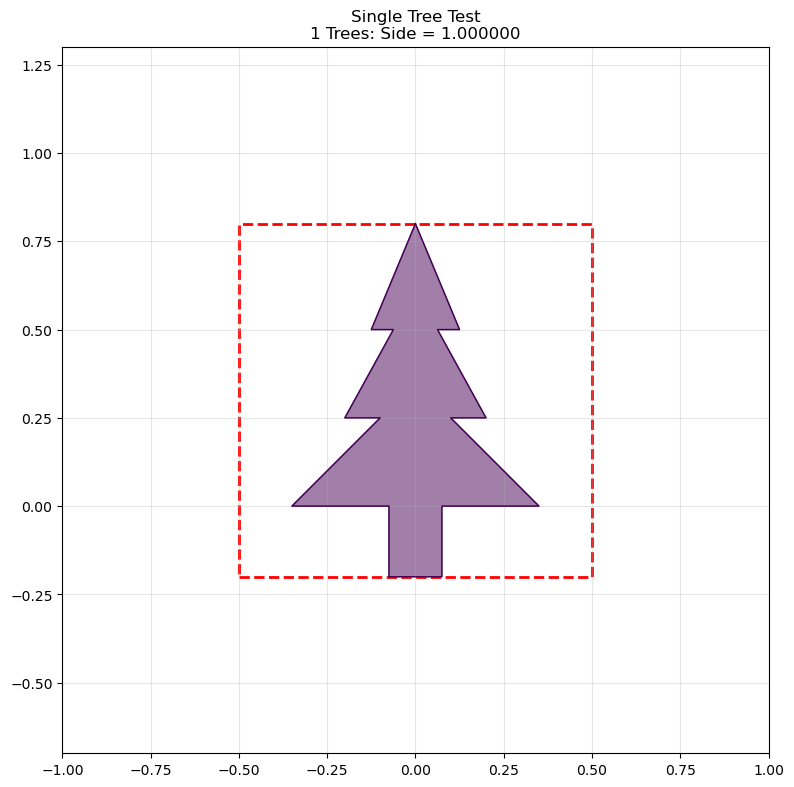

Point 0: (Decimal('0.0'), Decimal('0.8'))
Point 1: (Decimal('0.125'), Decimal('0.5'))
Point 2: (Decimal('0.0625'), Decimal('0.5'))
Point 3: (Decimal('0.2'), Decimal('0.25'))
Point 4: (Decimal('0.1'), Decimal('0.25'))
Point 5: (Decimal('0.35'), Decimal('0.0'))
Point 6: (Decimal('0.075'), Decimal('0.0'))
Point 7: (Decimal('0.075'), Decimal('-0.2'))
Point 8: (Decimal('-0.075'), Decimal('-0.2'))
Point 9: (Decimal('-0.075'), Decimal('0.0'))
Point 10: (Decimal('-0.35'), Decimal('0.0'))
Point 11: (Decimal('-0.1'), Decimal('0.25'))
Point 12: (Decimal('-0.2'), Decimal('0.25'))
Point 13: (Decimal('-0.0625'), Decimal('0.5'))
Point 14: (Decimal('-0.125'), Decimal('0.5'))


In [2]:
tree = ChristmasTree(center_x='0', center_y='0', angle='0')
plot_configuration(trees=[tree], title="Single Tree Test")

for i in range(len(tree._tree_points)):
    print(f'Point {i}: {tree._tree_points[i]}')

>>>>> solve_2_trees_equations.py:105 "solution"
[ 4.40778602e-01 -2.70081405e+00  2.82422920e-01  5.39288496e-01
  8.00000000e-01  2.01157493e+00  1.57079633e+00 -3.41315022e-01
  2.13600094e-01 -1.48878840e+00 -1.92956700e+00 -2.12882234e-01
  5.03891109e-01  1.88721993e+00  1.44644133e+00 -1.56795654e-01
  4.78875112e-01  3.20156212e-01  1.33683399e+00  8.96055385e-01
  7.42230061e-02  3.11433694e-01  3.50000000e-01  4.40778602e-01
 -1.39121104e-20  3.16546913e-01  1.49325322e-01 -3.41239935e-02
  3.89963174e-01  2.08199914e-01  2.27854803e-01  4.39218574e-01
  6.04133840e-02  6.23737942e-01 -1.84247306e-01  2.64925646e-01
  7.52170730e-01]

Optimization success: True
Cost (sum of squares): 2.9977464041159403e-19
Optimality: 6.242118280597175e-10


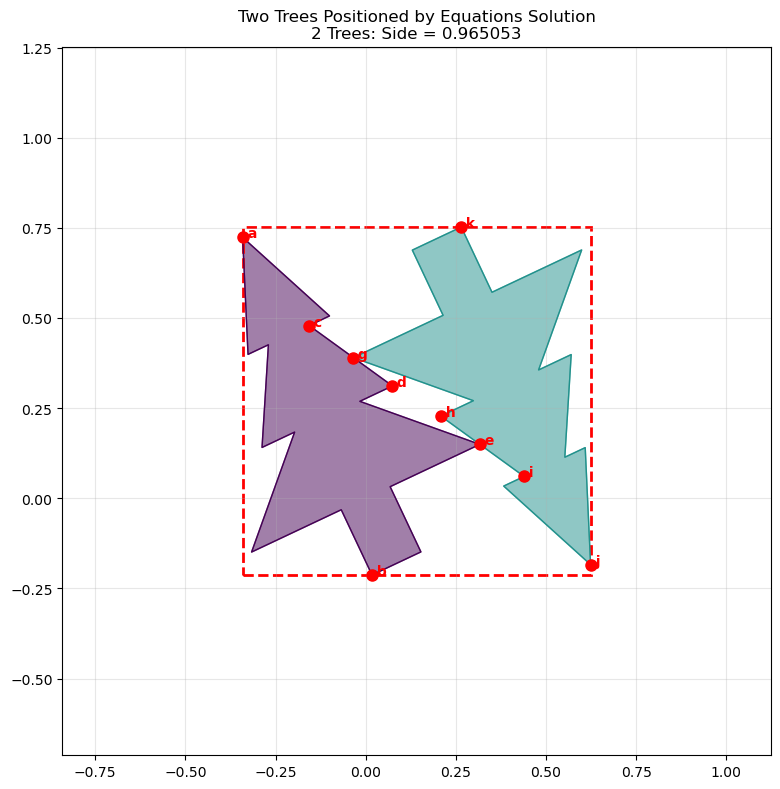

In [3]:

def system(vars):
    # each point from a to k is a point in one of the trees
    # each point can have 5 variables associated.
    # e.g.
    # c: distance from origin to point c
    # cp: angle from origin to point c with 0 at x axis
    # cpp: original angle from origin to point c before tree rotation (ChristmasTree(center_x='0', center_y='0', angle='0'))
    # cx: x coordinate of point c
    # cy: y coordinate of point c
    (
        # trees angles
        t1, t2,
        # tree 2 position
        fx, fy,
        # tree 1 points, tree one positioned is at (0,0)
        a, ap, app, ax,
        b, bp, bpp, by,
        c, cp, cpp, cx, cy,
        d, dp, dpp, dx, dy,
        e, ep, epp, ex, ey,
        # tree 2 points, tree two positioned is at (fx, fy)
        gx, gy,
        hx, hy,
        ix, iy,
        jx, jy,
        kx, ky
    ) = vars
    # points = tree._tree_points
    points = [[float(x), float(y)] for x, y in tree._tree_points]


    tree_side = points[5][0] # 0.35
    tree_height = points[0][1] # 0.8


    equations = [
        a - tree_height,
        app - (np.pi / 2),
        ap - (app + t1),
        ax - (a * np.cos(ap)),

        b - (np.sqrt(points[8][0]**2 + points[8][1]**2)),
        bpp - (np.arctan2(points[8][1], points[8][0])),
        bp - (bpp + t1),
        by - (b * np.sin(bp)),

        c - (np.sqrt(points[2][0]**2 + points[2][1]**2)),
        cpp - (np.arctan2(points[2][1], points[2][0])),
        cp - (cpp + t1),
        cx - (c * np.cos(cp)),
        cy - (c * np.sin(cp)),

        d - (np.sqrt(points[3][0]**2 + points[3][1]**2)),
        dpp - (np.arctan2(points[3][1], points[3][0])),
        dp - (dpp + t1),
        dx - (d * np.cos(dp)),
        dy - (d * np.sin(dp)),

        e - tree_side,
        epp - 0,
        ep - (epp + t1),
        ex - (e * np.cos(ep)),
        ey - (e * np.sin(ep)),

        gx - (fx + e * np.cos(epp + t2)),
        gy - (fy + e * np.sin(epp + t2)),

        kx - (fx + b * np.cos(bpp + t2)),
        ky - (fy + b * np.sin(bpp + t2)),

        hx - (fx + d * np.cos(dpp + t2)),
        hy - (fy + d * np.sin(dpp + t2)),

        ix - (fx + c * np.cos(cpp + t2)),
        iy - (fy + c * np.sin(cpp + t2)),

        jx - (fx + a * np.cos(app + t2)),
        jy - (fy + a * np.sin(app + t2)),

        # g in ray cd
        (gy - cy) - (((cy - dy)/(cx - dx)) * (gx - cx)),
        # e in ray hi
        (ey - hy) - (((hy - iy)/(hx - ix)) * (ex - hx)),

        # bounding box should be a square, horizontal distance from point a to j should equal vertical distance from point b to k
        (jx - ax) - (ky - by),

        # angles are opposite
        t1 - (t2 + np.pi)
    ]

    return equations

# approximate answers are:
# t1 = 0.43326
# t2 = -2.7029
# fx = 0.29299
# fy = 0.548763

initial_guess = [
    0.433, -2.7029, # tree angles
    0.3, 0.5, # f
    0.8, 1.5708, np.pi/2, 0.0, # a
    0.2, 0.0, -np.pi/2, -0.2, # b
    0.44721, np.pi/2, np.pi/2, 0.0, 0.44721, # c
    0.53852, np.pi/2, np.pi/2, 0.1, 0.53852, # d
    0.35, 0.0, np.pi/4, 0.35, 0.2, # e
    0.2, 0.4, # g
    0.2, 0.3, # h
    0.3, 0.2, #i 
    0.4, 0.0, #j
    0.3, 1.0  #k
]

####################################################################################################
# solution with no bound constraints
# solution = fsolve(equations, initial_guess)
####################################################################################################
n_vars = len(initial_guess)
lower_bounds = [-np.inf] * n_vars
upper_bounds = [np.inf] * n_vars
# Add constraint: t1 > 0 (index 0)
lower_bounds[0] = 0  # t1 >= 0
result = least_squares(system, initial_guess, bounds=(lower_bounds, upper_bounds))
solution = result.x
####################################################################################################

print('>>>>> solve_2_trees_equations.py:105 "solution"')
print(solution)
print(f'\nOptimization success: {result.success}')
print(f'Cost (sum of squares): {result.cost}')
print(f'Optimality: {result.optimality}')

(
    # trees angles
    t1, t2,
    # tree 2 position
    fx, fy,
    # tree 1 points, tree one positioned is at (0,0)
    a, ap, app, ax,
    b, bp, bpp, by,
    c, cp, cpp, cx, cy,
    d, dp, dpp, dx, dy,
    e, ep, epp, ex, ey,
    # tree 2 points, tree two positioned is at (fx, fy)
    gx, gy,
    hx, hy,
    ix, iy,
    jx, jy,
    kx, ky
) = solution

trees = [
    ChristmasTree(center_x='0', center_y='0', angle=str(t1 * 180 / np.pi)),
    ChristmasTree(center_x=str(fx), center_y=str(fy), angle=str(t2 * 180 / np.pi))
]

fig_ax = plot_configuration(trees=trees, title="Two Trees Positioned by Equations Solution", show=False)

# plot points a to k on the same figure
points_labels = ['a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'j', 'k']
points_coords = [
    (ax, a * np.sin(ap)),
    (b * np.cos(bp), by),
    (cx, cy),
    (dx, dy),
    (ex, ey),
    (gx, gy),
    (hx, hy),
    (ix, iy),
    (jx, jy),
    (kx, ky)
]

for label, (x, y) in zip(points_labels, points_coords):
    fig_ax.plot(x, y, 'ro', markersize=8, zorder=10)
    fig_ax.text(x, y, f' {label}', fontsize=10, fontweight='bold', color='red', zorder=11)

plt.show()

In [4]:
score_group(trees)

Group score: 0.4656636111591970579184442
